## Pypalettes

[pypalettes](https://github.com/JosephBARBIERDARNAL/pypalettes) is a python library that provides more than **2500 different** palettes to use in your data visualization. It comes with a very simple-to-use API that only requires **1 line of code**.

You can find your [dream palette](/color-palette-finder) on the [dedicated web app](/color-palette-finder) that **highlights** how palettes look like on different kind of charts.

You can install it by running `pip install pypalettes` in your terminal!


## Quick start

The easiest way to get started is to choose an **example that you like** and try to change the `name` argument of the `load_cmap()` function:


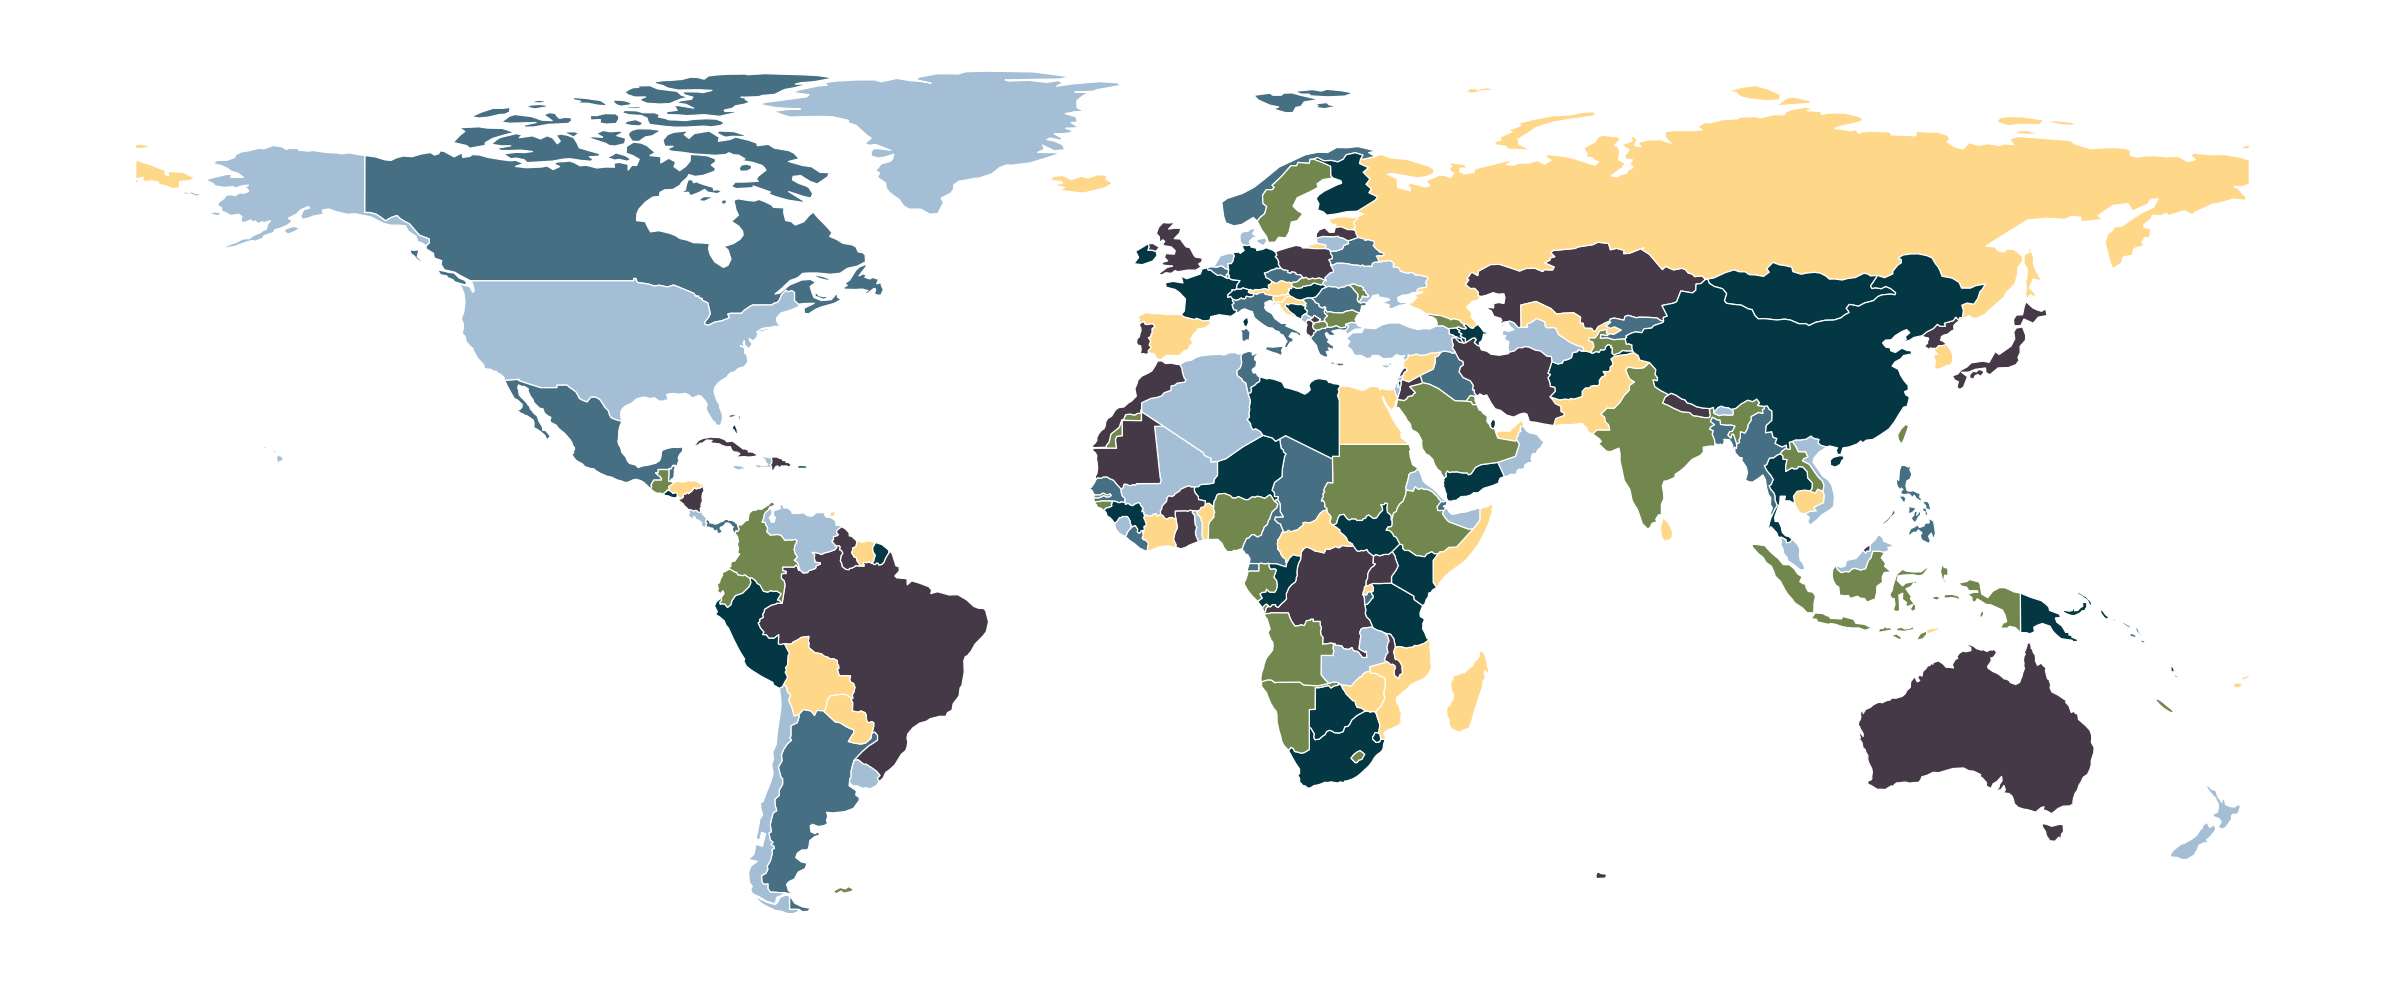

In [25]:
# load libraries
import geopandas as gpd
import matplotlib.pyplot as plt
from pypalettes import load_cmap

# load the world dataset
df = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/all_world.geojson')
df = df[df['name'] != 'Antarctica']

# create a color palette
cmap = load_cmap(name='Acadia')

# display the world map
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
ax.set_axis_off()
df.plot(ax=ax, cmap=cmap, edgecolor='white', linewidth=0.3)
plt.show()

## All the different ways to load a colormap

Let's start by importing the `load_cmap()` function:


In [26]:
from pypalettes import load_cmap

### Load a random palette


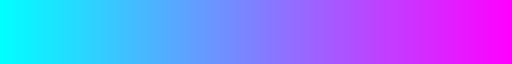

In [27]:
cmap = load_cmap('random')
cmap

### Load a specific colormap


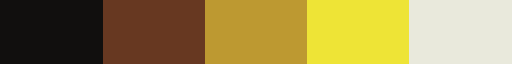

In [28]:
cmap = load_cmap('Acanthurus_triostegus')
cmap

### Continuous version of a palette with `cmap_type='continuous'` (default is `'discrete'`)


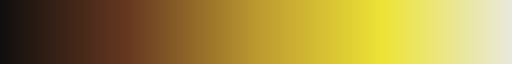

In [29]:
cmap = load_cmap('Acanthurus_triostegus', cmap_type='continuous')
cmap

### Reverse the order of a colormap with `reverse=True`


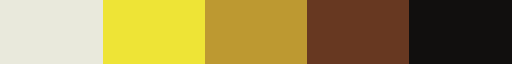

In [30]:
cmap = load_cmap('Acanthurus_triostegus', reverse=True)
cmap

### Keep only the first colors of a palette with `keep_first_n`


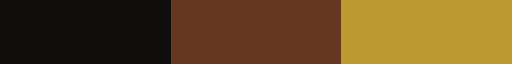

In [31]:
cmap = load_cmap('Acanthurus_triostegus', keep_first_n=3)
cmap

### Keep only specific colors from a palette with the `keep` argument


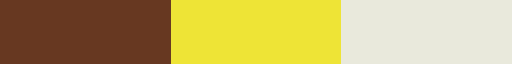

In [32]:
cmap = load_cmap('Acanthurus_triostegus', keep=[False, True, False, True, True])
cmap

## Discrete palettes

When loading a discrete palette, it looks like this:


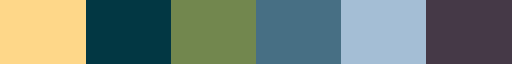

In [33]:
from pypalettes import load_cmap

cmap = load_cmap("Acadia")
cmap

In this case, cmap is actually a function that can be used to retrieve elements. For example:

- `cmap(0)` gives us the first color (RGBA format) of the palette
- `cmap(1)` gives us the second one
- and so on


In [34]:
print(cmap(0))
print(cmap(1))

(0.996078431372549, 0.8431372549019608, 0.5372549019607843, 1.0)
(0.00784313725490196, 0.21568627450980393, 0.2627450980392157, 1.0)


What if we try `cmap(10)` for a palette of only 7 colors like in our case? It returns the **last color** in the palette:


In [35]:
print(f'{cmap(0)}')
print(f'{cmap(1)}')
print(f'{cmap(2)}')
print(f'{cmap(3)}')  
print(f'{cmap(4)}')
print(f'{cmap(5)}')
print(f'{cmap(6)}')
print(f'{cmap(7)}\n')

print(f'cmap(6) == cmap(7): {cmap(6) == cmap(7)}')

(0.996078431372549, 0.8431372549019608, 0.5372549019607843, 1.0)
(0.00784313725490196, 0.21568627450980393, 0.2627450980392157, 1.0)
(0.4470588235294118, 0.5294117647058824, 0.3058823529411765, 1.0)
(0.2784313725490196, 0.43529411764705883, 0.5176470588235295, 1.0)
(0.6431372549019608, 0.7450980392156863, 0.8352941176470589, 1.0)
(0.27058823529411763, 0.2235294117647059, 0.2784313725490196, 1.0)
(0.27058823529411763, 0.2235294117647059, 0.2784313725490196, 1.0)
(0.27058823529411763, 0.2235294117647059, 0.2784313725490196, 1.0)

cmap(6) == cmap(7): True


Ok now let's see we use for a **real chart**. We will create the now famous iris scatter plot, with colors from [pypalettes](/color-palette-finder).


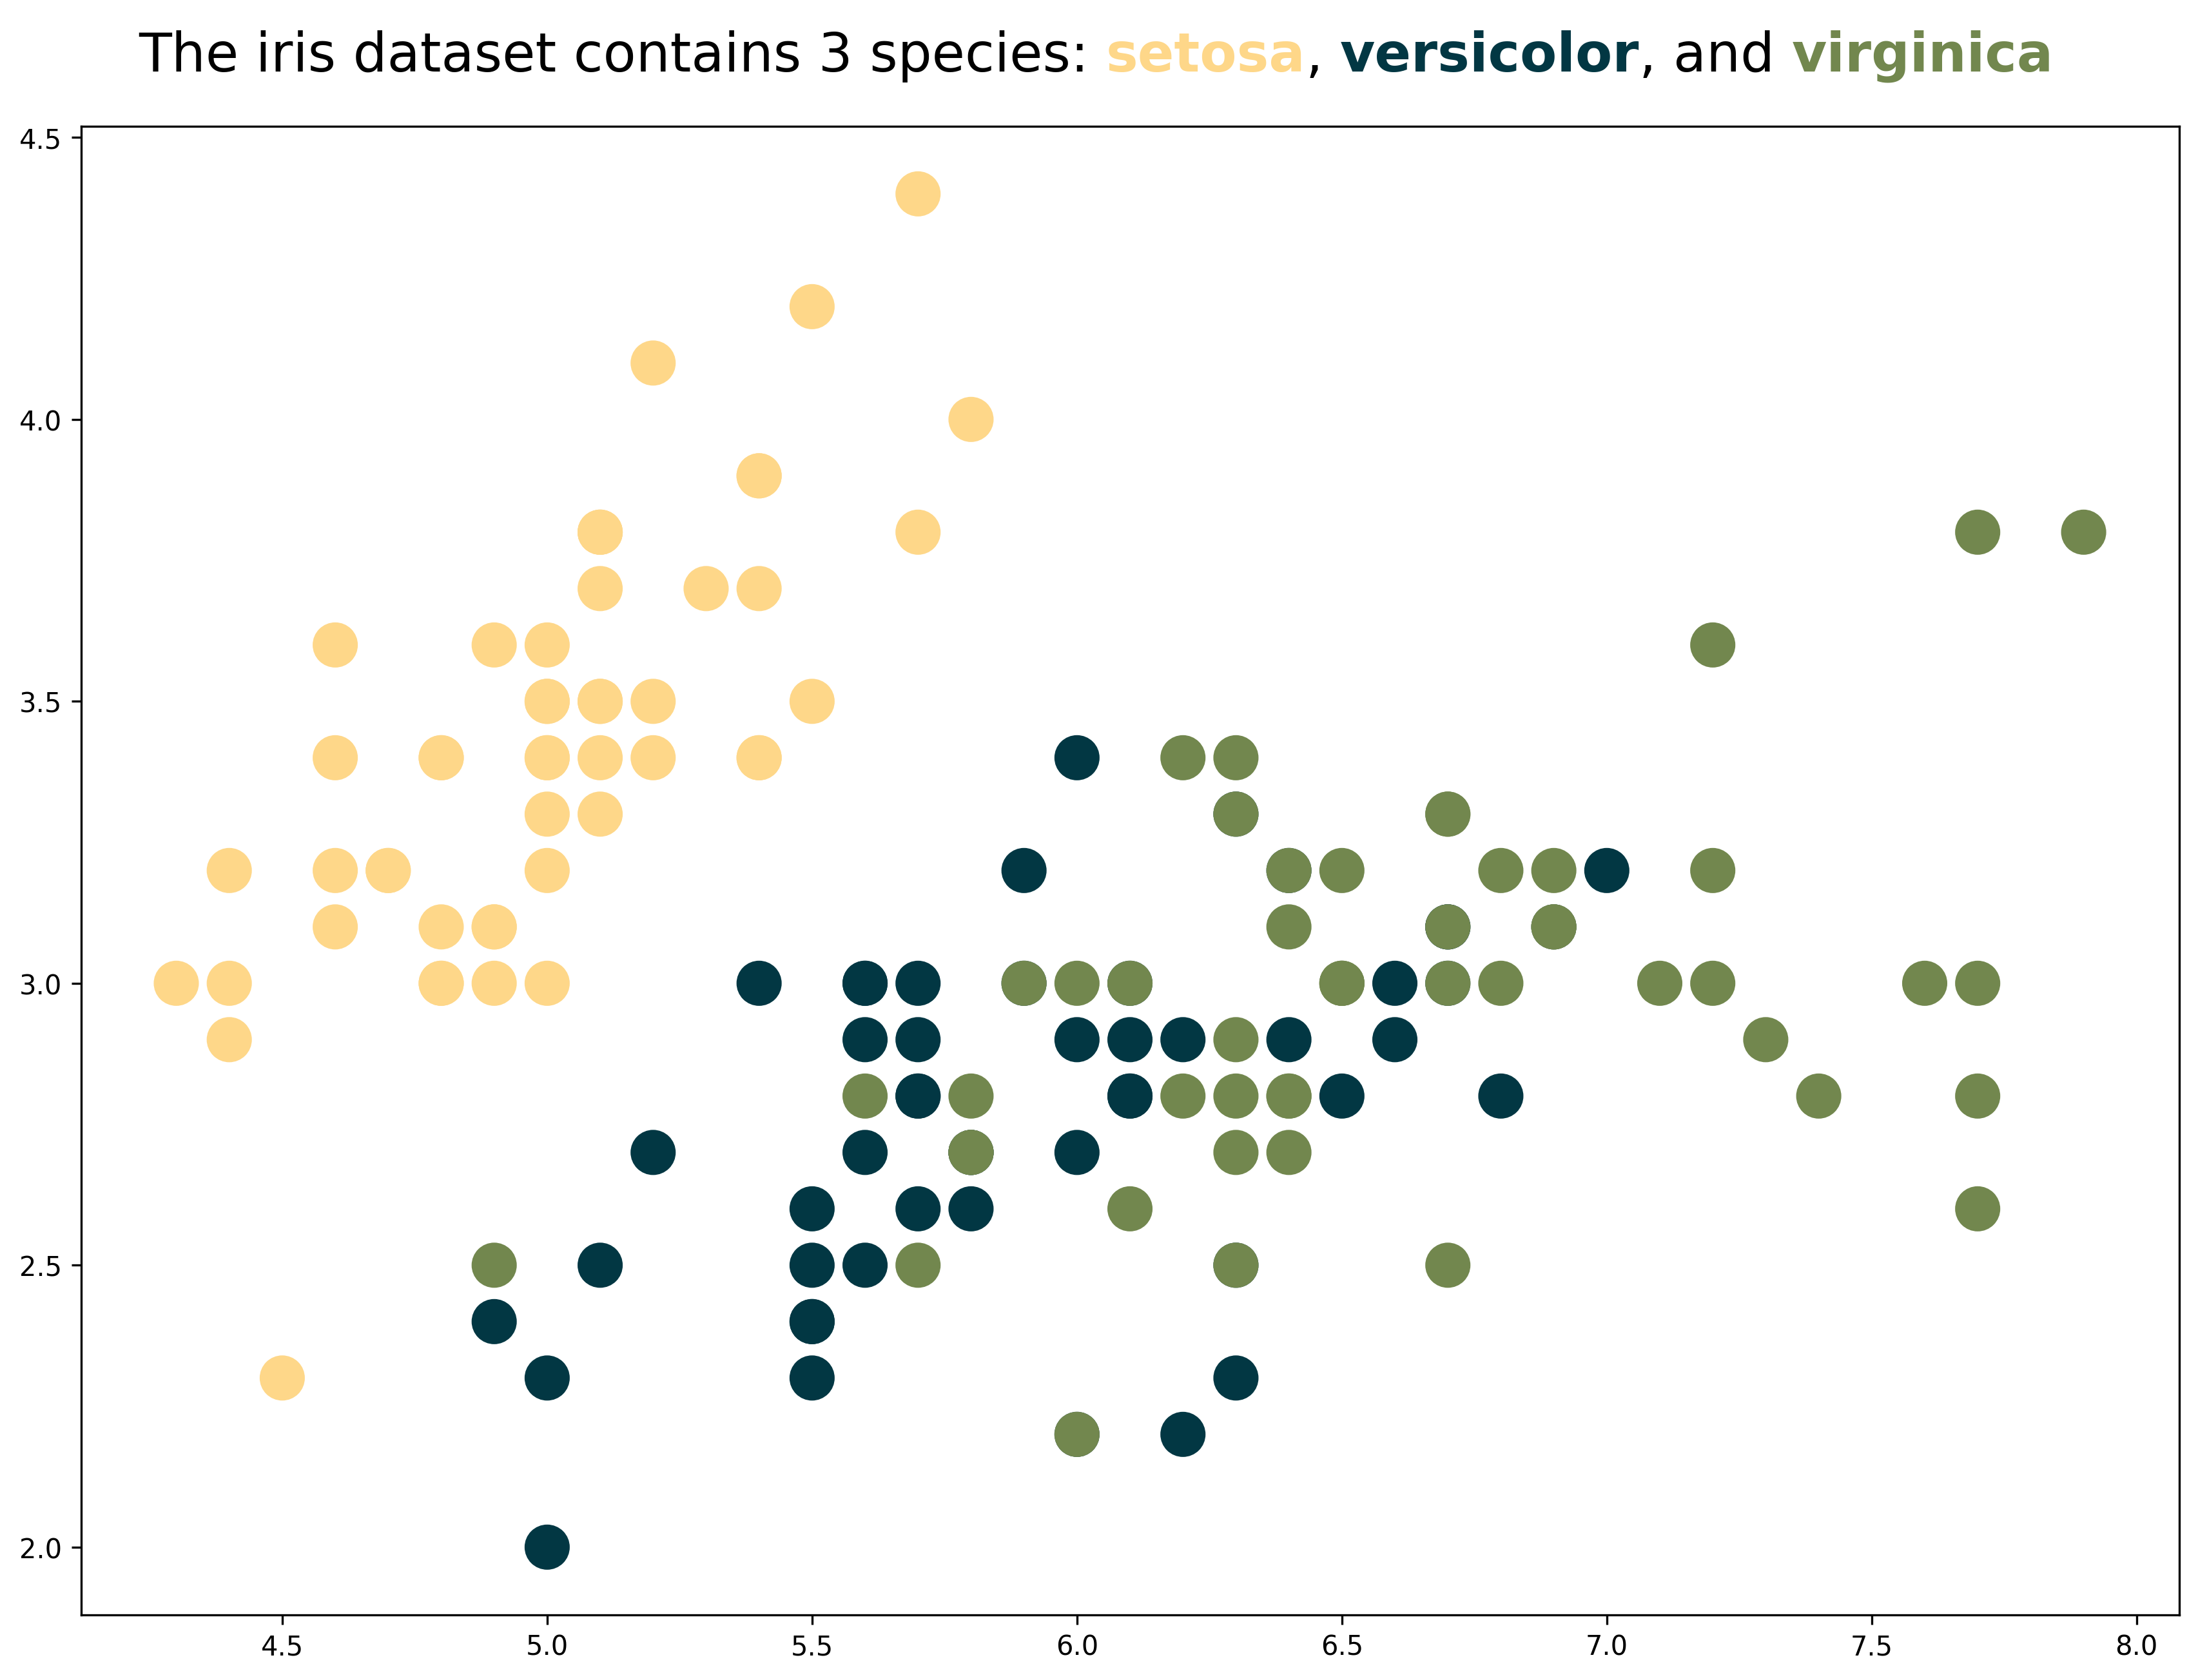

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from highlight_text import fig_text

# load the color map
cmap = load_cmap("Acadia", keep_first_n=3)

# load the dataset
df = sns.load_dataset('iris')

# the column that we want to map with colors must be a `category`
df['species'] = df['species'].astype("category")

# create the chart
fig, ax = plt.subplots(figsize=(14, 10), dpi=300)
ax.scatter(
   x=df['sepal_length'], y=df['sepal_width'],
   c=df['species'].cat.codes, cmap=cmap,
   s=250
)

# title
fig_text(
    s='The iris dataset contains 3 species: <setosa>, <versicolor>, and <virginica>',
    x=.5, y=0.93, fontsize=20, ha='center',
    highlight_textprops=[{"color": cmap(0), 'fontweight': 'bold'},
                         {"color": cmap(1), 'fontweight': 'bold'},
                         {"color": cmap(2), 'fontweight': 'bold'}]
)
plt.show()

## Continuous palettes

Continuous and discrete palettes are very similar but need to be used in a **different way**.

When loading a continuous palette, it looks like this:


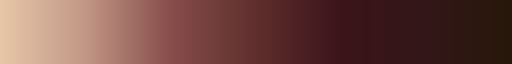

In [37]:
from pypalettes import load_cmap

cmap = load_cmap("Aurora", cmap_type='continuous')
cmap

The `cmap` object is still a function, but `cmap(0)` returns the **first color** of the palette and `cmap(1)` the **last one** (not totally exact, but it doesn't matter here).

_Note: this does not matter when using the `cmap` argument from matplotlib/seaborn and pass it directly the cmap from pypalettes._


In [38]:
cmap(0.5) # middle color

(0.3708881199538639, 0.18306805074971166, 0.17559400230680508, 1.0)

Ok now let's see we use for a **real chart**. We will create a heatmap, with colors from [pypalettes](/color-palette-finder).


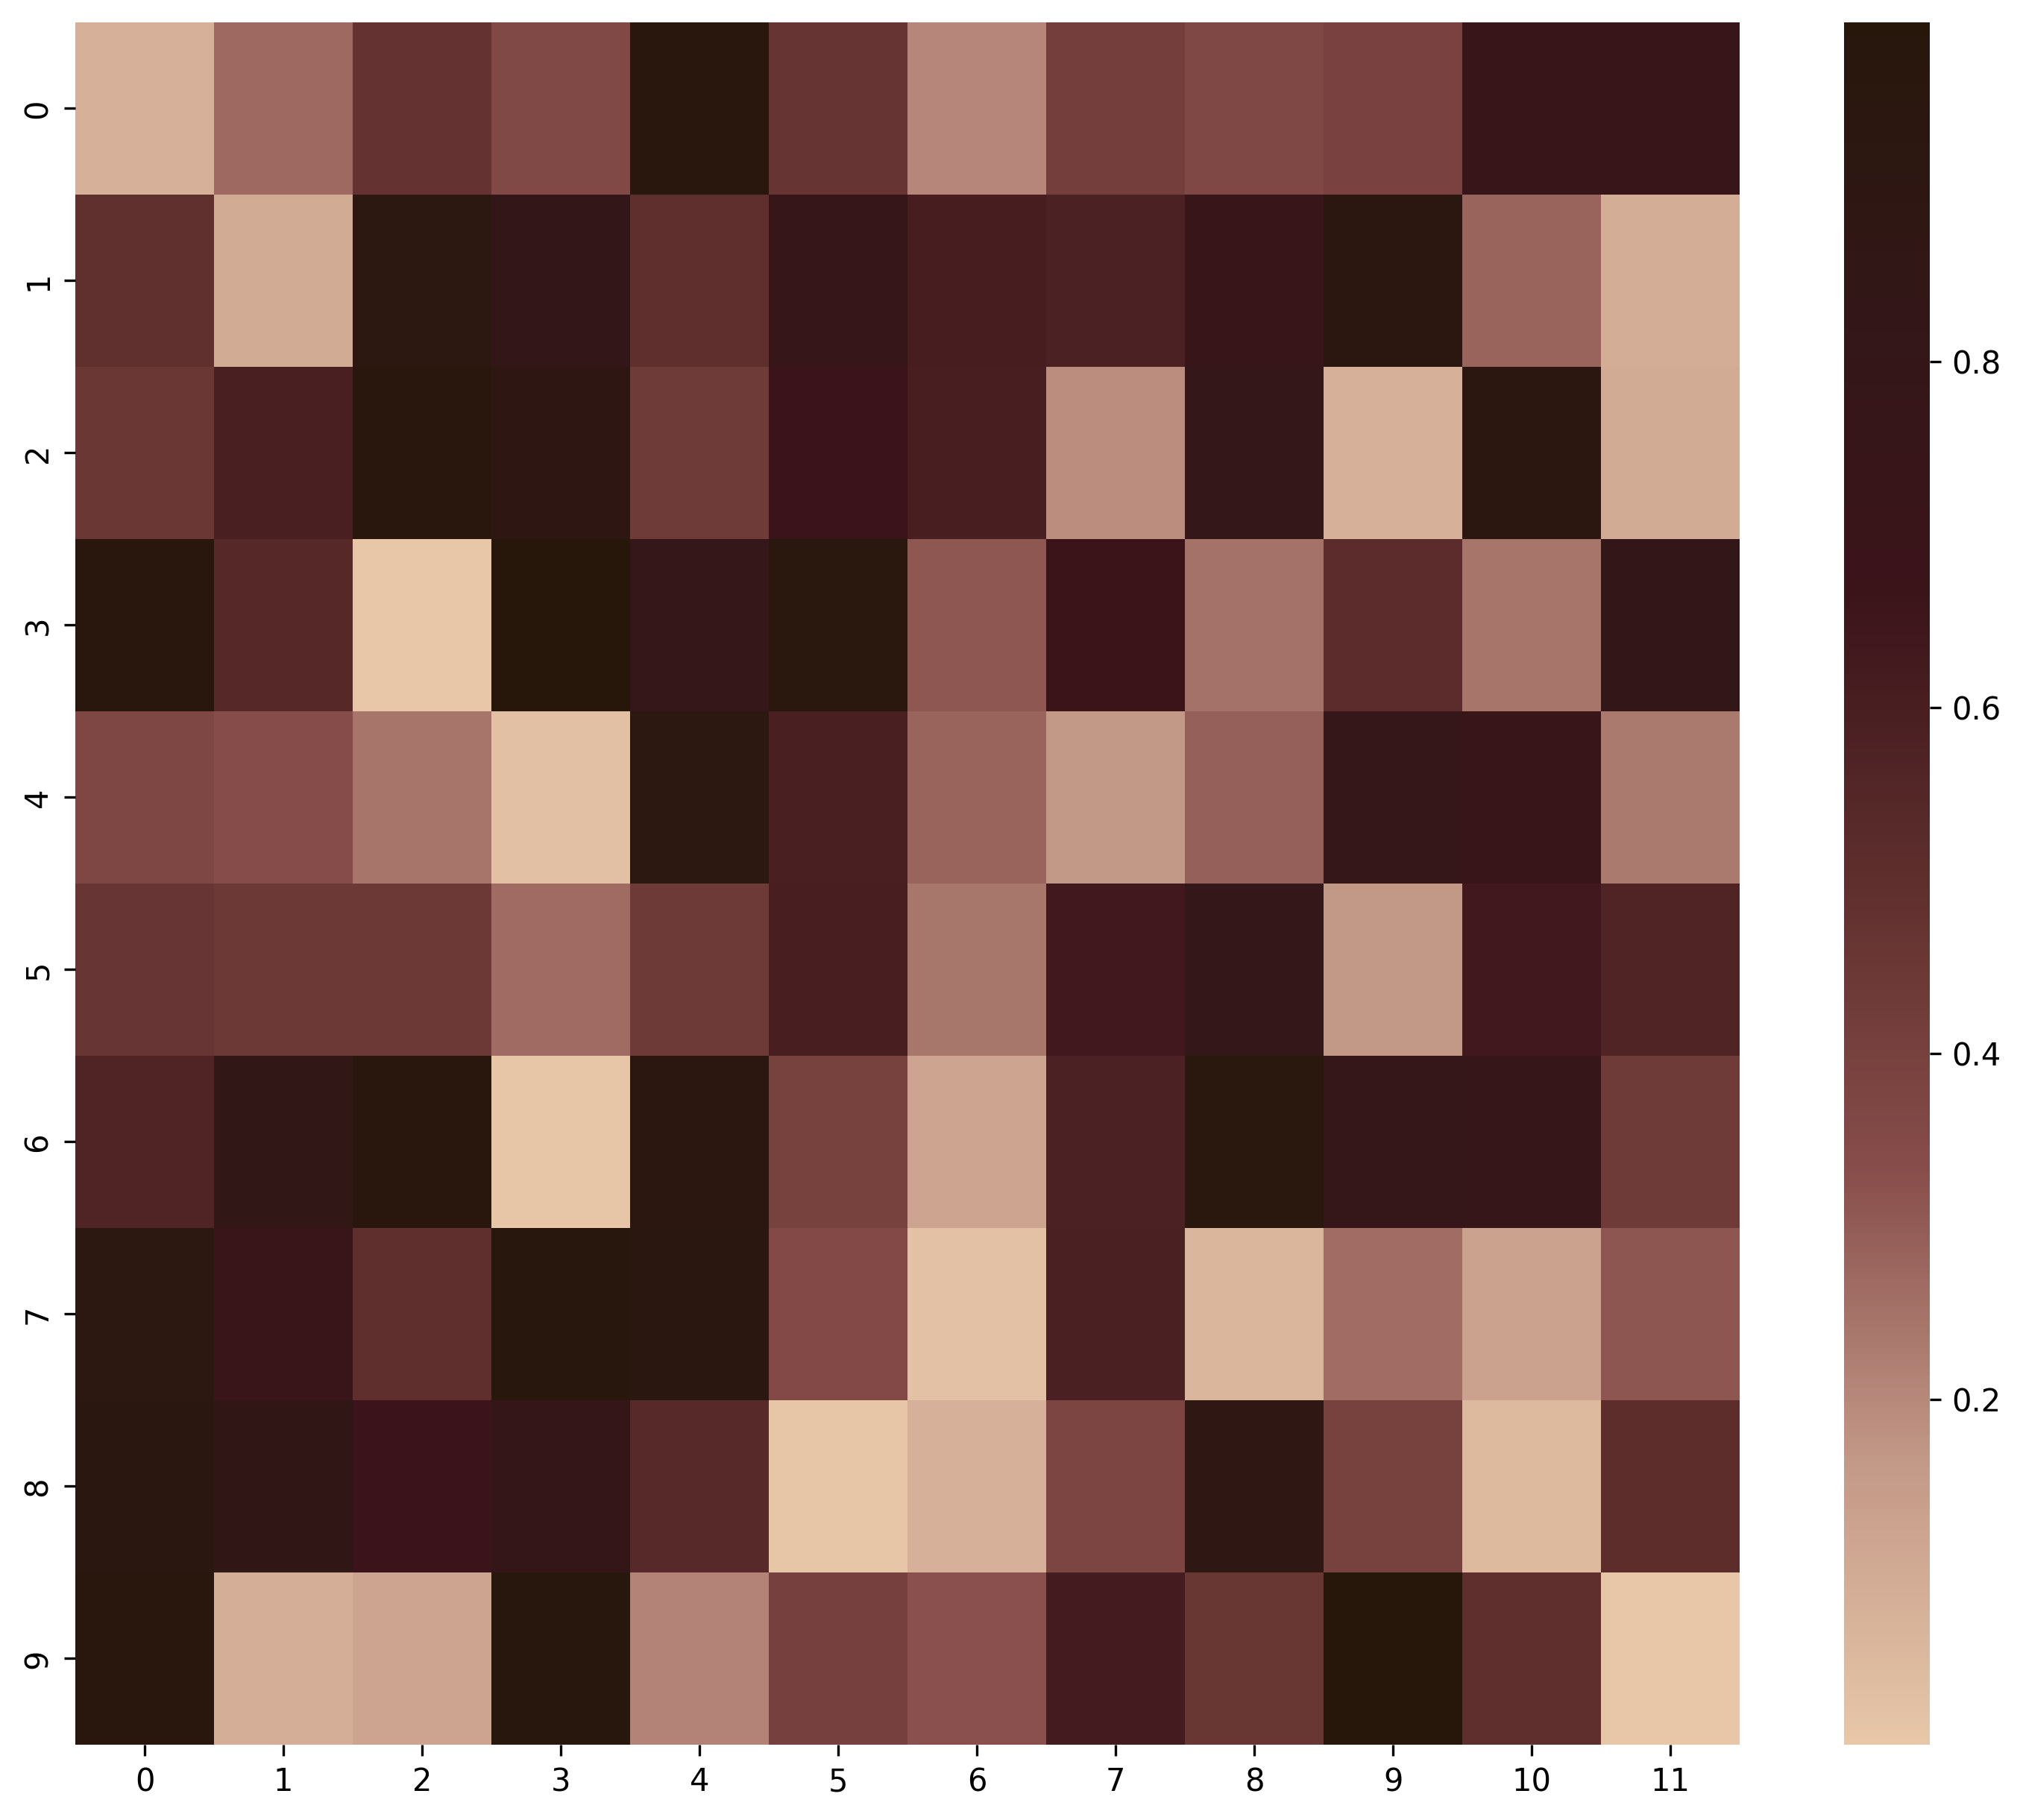

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from pypalettes import load_cmap
import numpy as np

# create a simple matrix
data = np.random.rand(10, 12)

# load the colormap
cmap = load_cmap('Aurora', cmap_type='continuous')

# create the chart
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
sns.heatmap(data, cmap=cmap, ax=ax)
plt.show()

## Get values and properties of colormaps

Since the returned object of the `load_cmap()` function is either [matplotlib.colors.LinearSegmentedColormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html) or [matplotlib.colors.ListedColormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html) depending on the value of the `type` (`continuous` or `discrete`) argument, the cmap has some usefull attributes/methods:


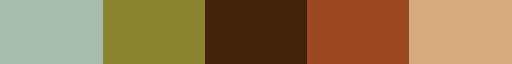

In [40]:
cmap = load_cmap('GrantWood')
cmap

In [41]:
cmap.colors # same result as using `get_hex(palette_name)`

['#A6BDB0FF', '#8B842FFF', '#41240BFF', '#9C4823FF', '#D6AA7EFF']

In [42]:
cmap.name

'GrantWood'

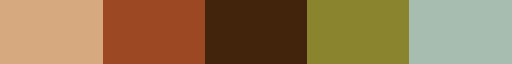

In [43]:
cmap.reversed() # save result as using `load_cmap(palette_name, reverse=True)`

## Broader usages

[pypalettes](https://python-graph-gallery.com/color-palette-finder/) also provides a few tools to retrieve palette properties, such as the `get_rgb()` and `get_hex()` functions.

These functions also accept the `reverse`, `keep` and `keep_first_n` arguments for more combinations.


In [44]:
from pypalettes import get_rgb
get_rgb('AirNomads')

[(255, 153, 51),
 (194, 72, 65),
 (255, 255, 51),
 (139, 91, 69),
 (135, 175, 209),
 (238, 176, 90),
 (219, 197, 160)]

In [45]:
from pypalettes import get_hex
get_hex('pupitar')

['#7098C0FF',
 '#88C0E8FF',
 '#285880FF',
 '#B8E0F8FF',
 '#F8F8F8FF',
 '#404060FF',
 '#A8A8A8FF',
 '#C8C8D0FF',
 '#B04000FF']

And finally, [pypalettes](https://python-graph-gallery.com/color-palette-finder/) also provides a way of acknowledging the authors of the palette with a `get_source()` function which indicates the original source.


In [46]:
from pypalettes import get_source
get_source('bilbao')

'The R package: {khroma}'

Bonus: a `get_kind()` function to find what is the type of palette. Either `qualitative` or `sequential`.


In [47]:
from pypalettes import get_kind
get_kind('pupitar')

'qualitative'

## Going further

### Palette finder

Browse the [color palette finder](/color-palette-finder) to find your dream palette!

![](https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/asset/pypalettes.gif)

<br>

### Related

- the [colors section of the gallery](/python-colors)
- the [github repository](https://github.com/JosephBARBIERDARNAL/pypalettes) of `PyPalettes`
